In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df = df.drop(['date','street','statezip'],axis=1)

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA


In [6]:
#Encode the object as an enumerated type or categorical variable.
df['city']=pd.factorize(df['city'])[0]
df['country']=pd.factorize(df['city'])[0]

In [7]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4,4
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,1,1
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,4,4
7,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,5,5
8,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,6,6
9,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,1,1


In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'country'],
      dtype='object')

In [9]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'city', 'country']]
y = df['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [11]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
print((model.score(X_test,y_test))*100,"%")

43.96588976554929 %


In [12]:
joblib.dump(model,'lin_reg.joblib')

['lin_reg.joblib']

In [13]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,city,country
2915,3.0,2.75,1910,7280,1.0,0,0,3,13,13
2905,4.0,2.50,2840,11044,2.0,0,0,3,13,13
4363,3.0,2.00,1570,7200,1.0,0,0,4,0,0
2723,3.0,2.25,1230,1238,2.0,0,0,3,1,1
2186,4.0,2.50,3040,7000,2.0,0,0,3,27,27
...,...,...,...,...,...,...,...,...,...,...
1992,4.0,1.75,2000,6032,1.0,0,2,3,1,1
3557,5.0,2.50,2500,7200,1.0,0,0,4,4,4
1350,3.0,1.75,1840,4030,1.0,0,0,5,1,1
2659,3.0,3.25,2420,1923,2.0,0,2,3,1,1


In [14]:
y_test

2915     441000.0
2905     585000.0
4363     176225.0
2723     435000.0
2186    1230000.0
          ...    
1992     453500.0
3557     661500.0
1350     457500.0
2659    1010000.0
3091     650000.0
Name: price, Length: 1380, dtype: float64

In [15]:
test_data=pd.merge(X_test,y_test,right_index=True,left_index=True)

In [16]:
test_data.reset_index(drop=True)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,city,country,price
0,3.0,2.75,1910,7280,1.0,0,0,3,13,13,441000.0
1,4.0,2.50,2840,11044,2.0,0,0,3,13,13,585000.0
2,3.0,2.00,1570,7200,1.0,0,0,4,0,0,176225.0
3,3.0,2.25,1230,1238,2.0,0,0,3,1,1,435000.0
4,4.0,2.50,3040,7000,2.0,0,0,3,27,27,1230000.0
...,...,...,...,...,...,...,...,...,...,...,...
1375,4.0,1.75,2000,6032,1.0,0,2,3,1,1,453500.0
1376,5.0,2.50,2500,7200,1.0,0,0,4,4,4,661500.0
1377,3.0,1.75,1840,4030,1.0,0,0,5,1,1,457500.0
1378,3.0,3.25,2420,1923,2.0,0,2,3,1,1,1010000.0


In [17]:
test_data.to_csv('Test_data_w-target.csv',index=False)

In [18]:
df.head(
)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,1,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2,2
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4,4


In [6]:
df[df['price']<=1].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,0.0,3.979592,2.698980,2787.142857,16453.306122,1.500000,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286
std,0.0,1.108486,1.194584,1354.375625,27739.227932,0.520416,0.242226,1.485760,0.826331,1337.148708,612.726149,27.247964,988.903054
min,0.0,1.000000,1.000000,720.000000,3500.000000,1.000000,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000
25%,0.0,3.000000,2.000000,1910.000000,6863.000000,1.000000,0.000000,0.000000,3.000000,1310.000000,0.000000,1952.000000,0.000000
50%,0.0,4.000000,2.500000,2600.000000,9000.000000,1.500000,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000
75%,0.0,5.000000,3.500000,3500.000000,13783.000000,2.000000,0.000000,0.000000,4.000000,3020.000000,900.000000,1998.000000,1999.000000
max,0.0,6.000000,6.250000,8020.000000,188200.000000,3.000000,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000


In [7]:
df[df['price']>1].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
zero_price = df[df['price']<=1]

In [10]:
value_price = df[df['price']>1]

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

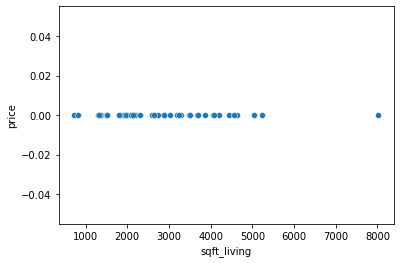

In [11]:
sns.scatterplot(x='sqft_living',y='price',data=zero_price)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

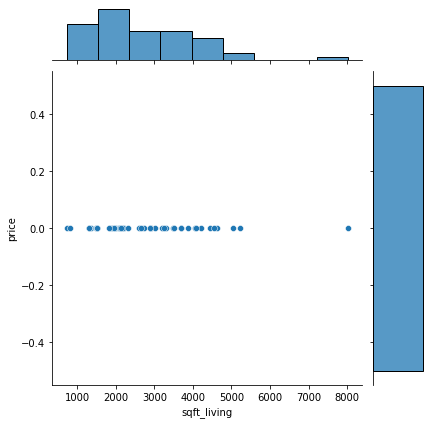

In [13]:
sns.jointplot(x='sqft_living',y='price',data=zero_price)

In [19]:
zero_price['city'].unique()

array(['Federal Way', 'Seattle', 'Burien', 'Issaquah', 'Sammamish',
       'Enumclaw', 'Normandy Park', 'Snoqualmie', 'Bellevue',
       'Mercer Island', 'Kent', 'Lake Forest Park', 'Covington', 'SeaTac',
       'Kenmore', 'Maple Valley', 'Woodinville', 'Clyde Hill', 'Renton',
       'Black Diamond', 'Auburn'], dtype=object)

In [15]:
value_price['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)